In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_df = pd.read_csv('bank.csv')

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [4]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no
5,60,retired,married,tertiary,no,100,no,no,NaN,5,may,528,1,-1,0,NaN,no
6,55,technician,married,secondary,no,1205,yes,no,NaN,5,may,158,2,-1,0,NaN,no
7,54,management,married,secondary,no,282,yes,yes,NaN,5,may,154,1,-1,0,NaN,no
8,55,services,divorced,secondary,no,91,no,no,NaN,5,may,349,1,-1,0,NaN,no
9,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes


In [5]:
bank_df.shape

(7234, 17)

In [6]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 欠損値の確認

In [7]:
bank_df.isnull().any(axis=1)  # 行方向

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool

In [8]:
bank_df.isnull().any(axis=0)  # 列方向

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

In [9]:
bank_df.isnull().sum(axis=1)  # 行方向

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64

In [10]:
bank_df.isnull().sum(axis=0)  # 列方向

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [11]:
bank_df.isnull().sum(axis=1).sort_values(0, ascending=False)

1837    4
1629    4
139     4
1814    4
1670    4
       ..
5919    0
5918    0
5917    0
5916    0
5379    0
Length: 7234, dtype: int64

In [12]:
bank_df.isnull().sum(axis=0).sort_values(0, ascending=False)

poutcome     5900
contact      2038
education     273
job            44
loan            0
marital         0
default         0
balance         0
housing         0
y               0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
age             0
dtype: int64

## 統計量の計算

In [13]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [14]:
bank_df.describe(include=object)  # object型のみ

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


In [15]:
bank_df.describe(exclude=object)  # object型以外

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


## データの可視化

findfont: Font family ["'Hiragino Mincho ProN'"] not found. Falling back to DejaVu Sans.


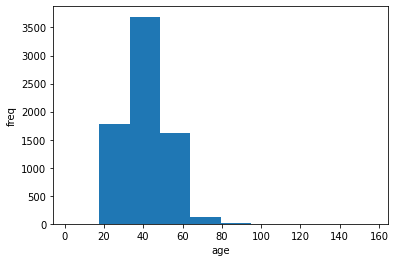

In [16]:
plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

In [20]:
def _bank_hist(column):
    plt.hist(bank_df[column])
    plt.xlabel(column)
    plt.ylabel('freq')
    plt.show()

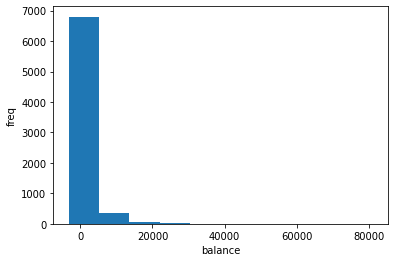

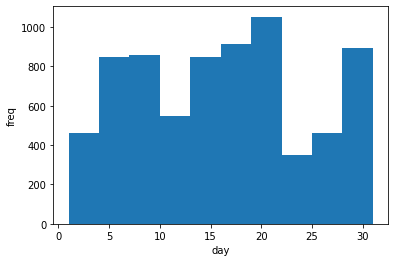

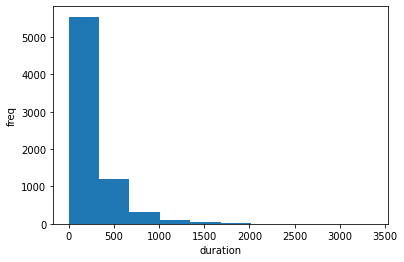

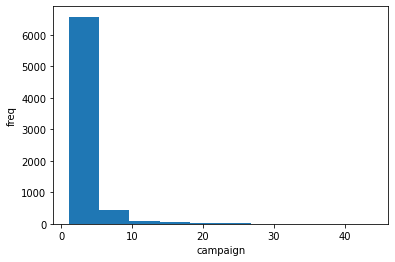

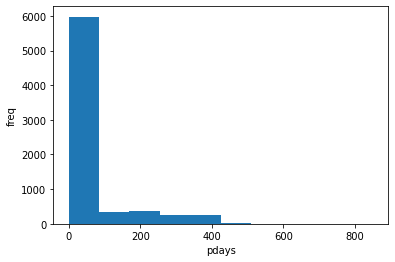

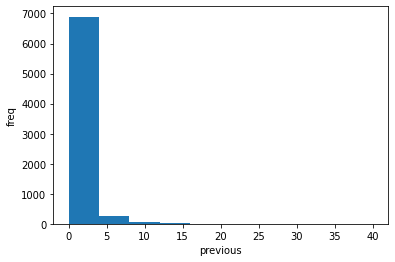

In [21]:
for column in ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    _bank_hist(column)

## 散布図

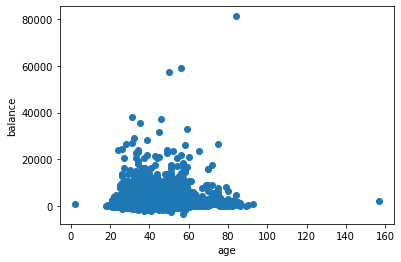

In [23]:
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

## 相関係数

In [25]:
bank_df[['age', 'balance']].corr()

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [32]:
def _bank_scatter(x1, x2):
    plt.scatter(bank_df[x1], bank_df[x2])
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.show()
    
    print(bank_df[[x1, x2]].corr())

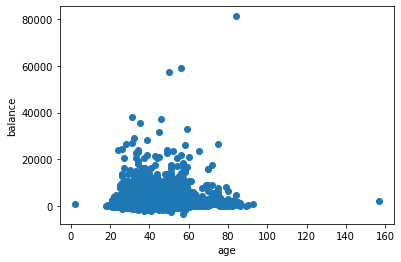

              age   balance
age      1.000000  0.112364
balance  0.112364  1.000000


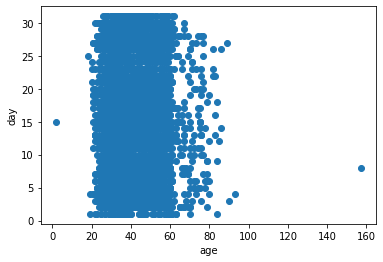

          age       day
age  1.000000 -0.015818
day -0.015818  1.000000


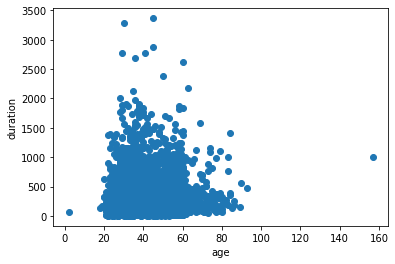

               age  duration
age       1.000000  0.006794
duration  0.006794  1.000000


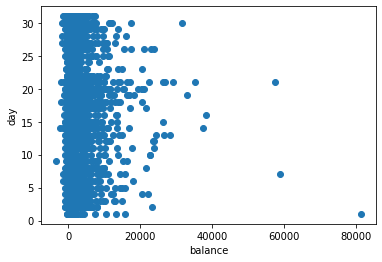

          balance       day
balance  1.000000  0.011404
day      0.011404  1.000000


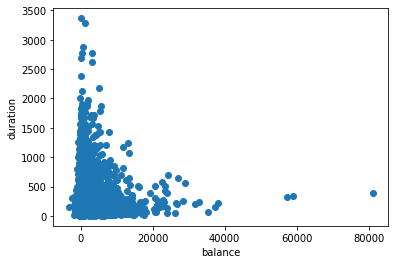

          balance  duration
balance   1.00000   0.00934
duration  0.00934   1.00000


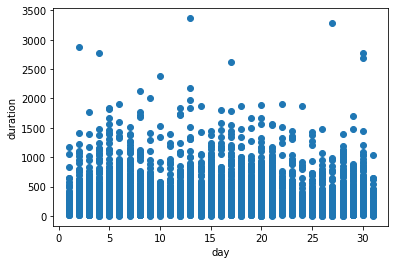

               day  duration
day       1.000000 -0.031867
duration -0.031867  1.000000


In [36]:
_bank_scatter('age', 'balance')
_bank_scatter('age', 'day')
_bank_scatter('age', 'duration')
_bank_scatter('balance', 'day')
_bank_scatter('balance', 'duration')
_bank_scatter('day', 'duration')

## 円グラフ

In [39]:
# 数値カウント

# ascending=False: 降順にする
# normalize=True: 出現数が１になるように正規化
bank_df['job'].value_counts(ascending=False, normalize=True)

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64

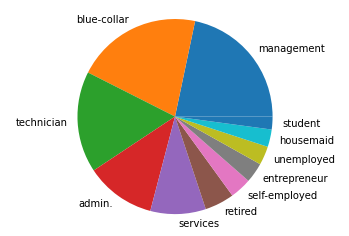

In [52]:
job_labels = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_values = bank_df['job'].value_counts(ascending=False, normalize=True).values

plt.pie(job_values, labels=job_labels)
plt.axis('equal')
plt.show()

In [53]:
def _bank_pie(column):
    counts = bank_df[column].value_counts(ascending=False, normalize=True)
    plt.pie(counts.values, labels=counts.index)
    plt.axis('equal')
    plt.show()

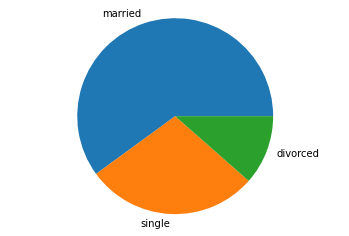

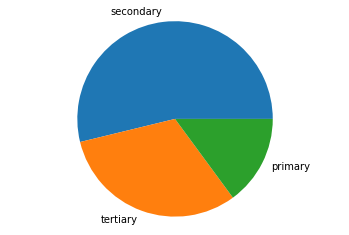

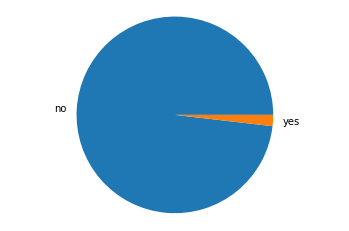

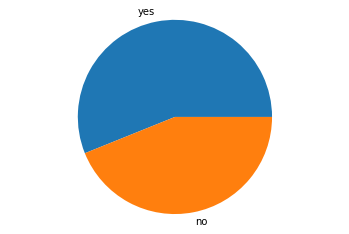

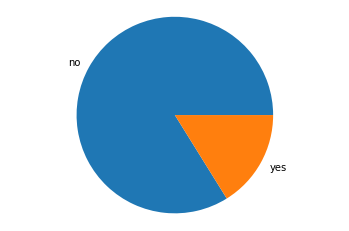

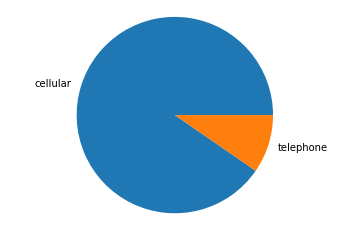

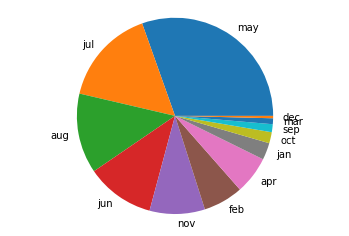

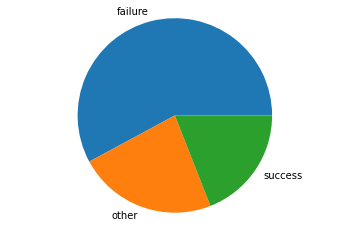

In [58]:
for column in ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    _bank_pie(column)

## 目的変数を検討

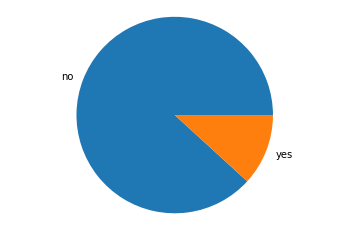

In [60]:
# 目的変数
_bank_pie('y')

- 目的変数y: `no` (預金申し込みなし), `yes` (預金申込あり)
- 圧倒的に `no` が多い
- モデル作成に使用するデータは均衡でああることが好ましい

## 箱ひげ図(目的変数yに対するデータ分布)

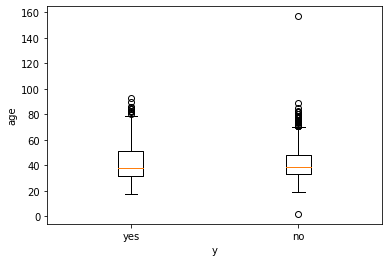

In [68]:
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels = ['yes', 'no'])
plt.show()

↑の `no` にはありえない数字が入っているので取り除く必要がある

In [74]:
def _bank_boxplot(column):
    y_yes = bank_df[bank_df['y'] == 'yes']
    y_no = bank_df[bank_df['y'] == 'no']
    y_age = [y_yes[column], y_no[column]]

    plt.boxplot(y_age)
    plt.xlabel('y')
    plt.ylabel(column)
    ax = plt.gca()
    plt.setp(ax, xticklabels = ['yes', 'no'])
    plt.show()

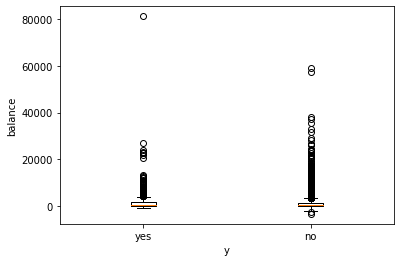

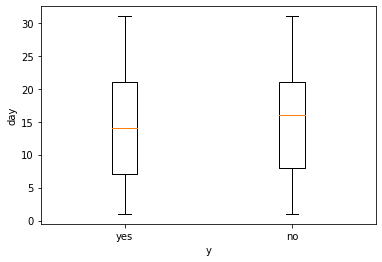

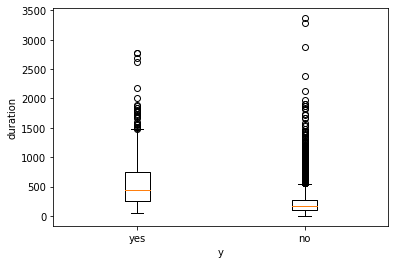

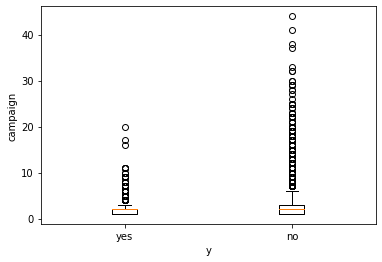

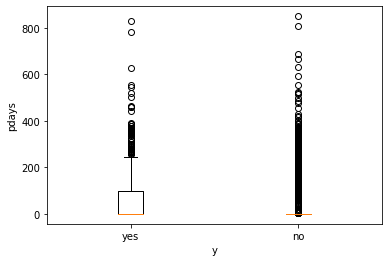

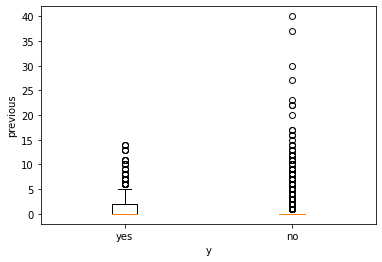

In [76]:
for column in ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    _bank_boxplot(column)